# Lending Club Loan Data Analysis

Submitted by: Timothy B. Bumagat

#### DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

#### Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

#### Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

#### Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Importing dataset and seeing its size
df = pd.read_csv('loan_data.csv')
df.shape

(9578, 14)

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#checking null values
df.isnull().sum(axis = 0)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Feature Transformation

Transform categorical values into numerical values (discrete)

In [6]:
#label encode 'purpose' to new column

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
df['LE Purpose'] = label_encoder.fit_transform(df['purpose'])

#reference: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
df['LE Purpose'].head()

0    2
1    1
2    2
3    2
4    1
Name: LE Purpose, dtype: int32

In [7]:
#Removing purpose (text) column to be replaced by label encoded column
norm = df
norm = norm.drop(columns=['purpose'])

### EDA
Exploratory data analysis of different factors of the dataset.

Find the imbalance in the dataset


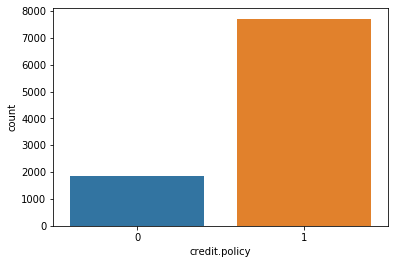

In [8]:
#credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
sns.countplot(df['credit.policy'].sort_values())

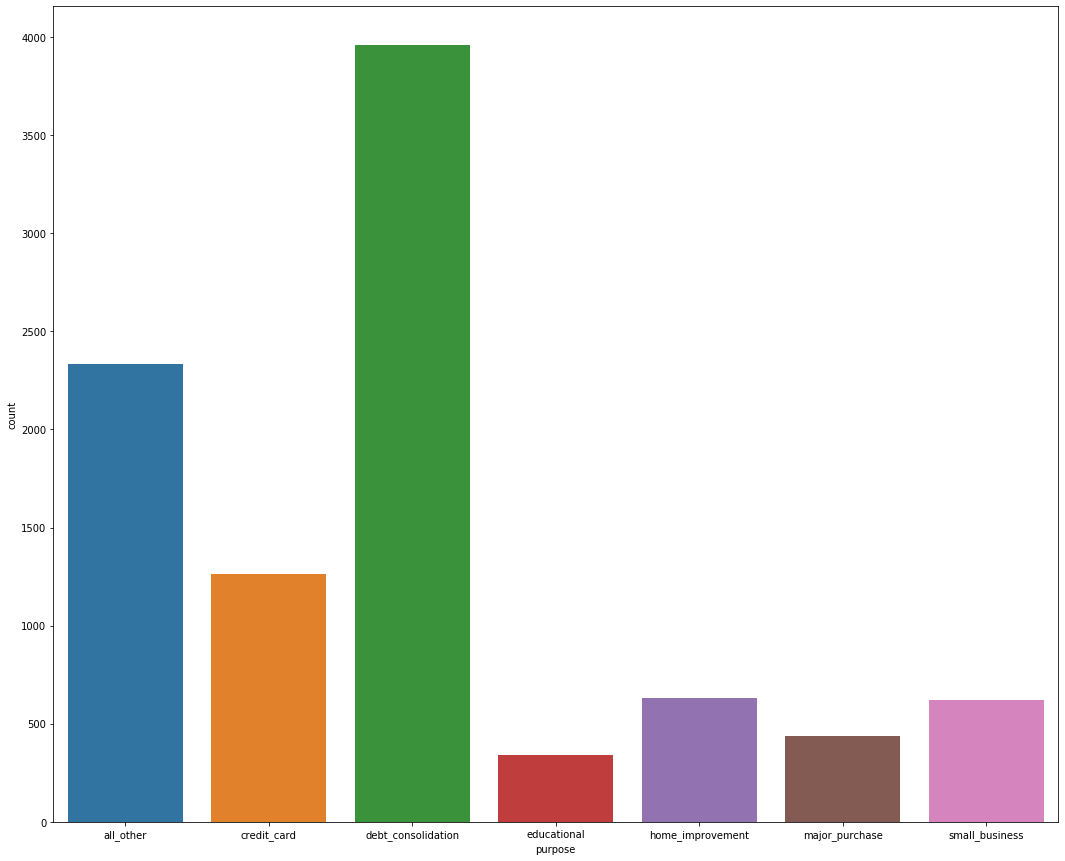

In [9]:
#purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
plt.figure(figsize=(18,15))
sns.countplot(df['purpose'].sort_values())
plt.show()

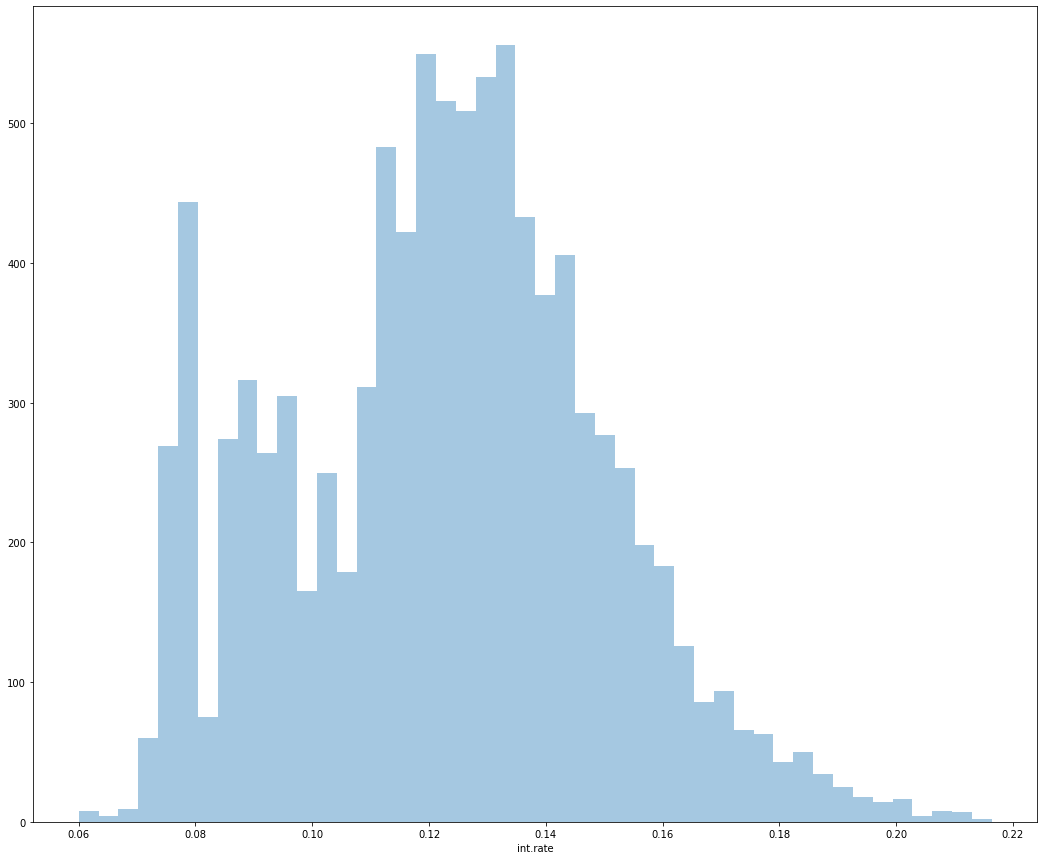

In [10]:
#int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
plt.figure(figsize=(18,15))
sns.distplot(df['int.rate'], kde=False)
plt.show()

It is interesting to note that among the highest count of loans, the loans have an interest rate between 12 to 14%.

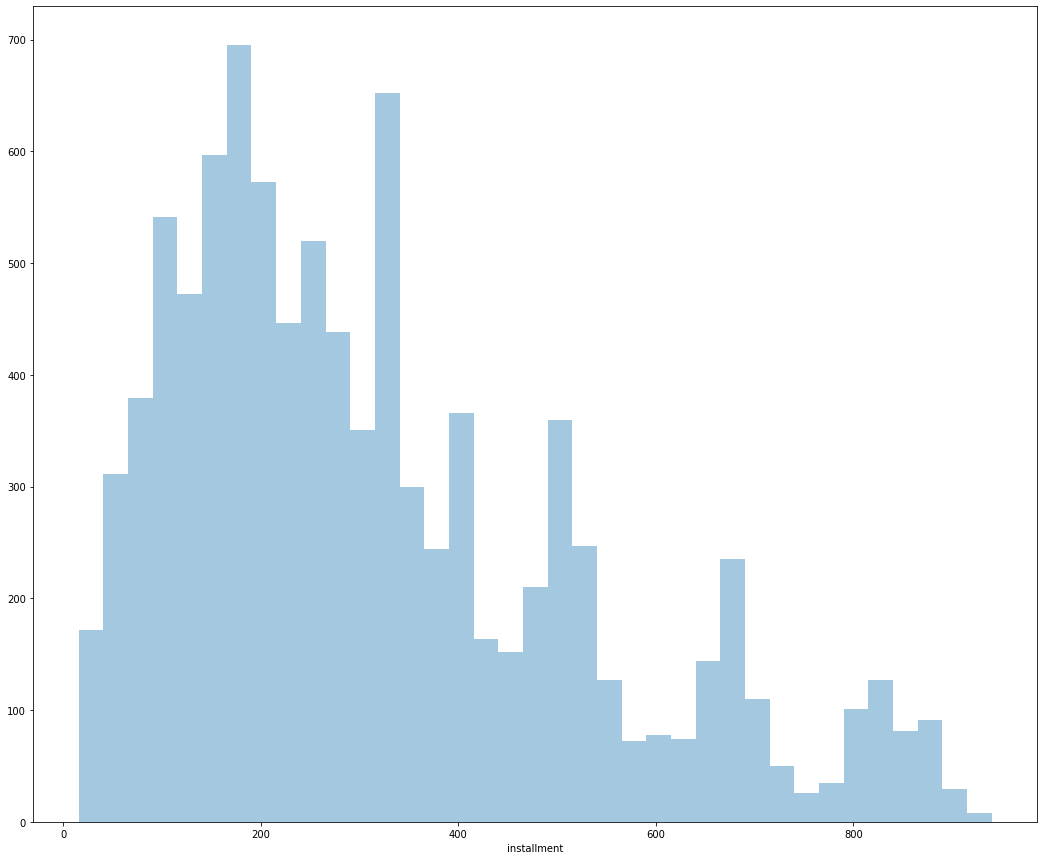

In [11]:
#installment: The monthly installments owed by the borrower if the loan is funded.
plt.figure(figsize=(18,15))
sns.distplot(df['installment'], kde=False)
plt.show()

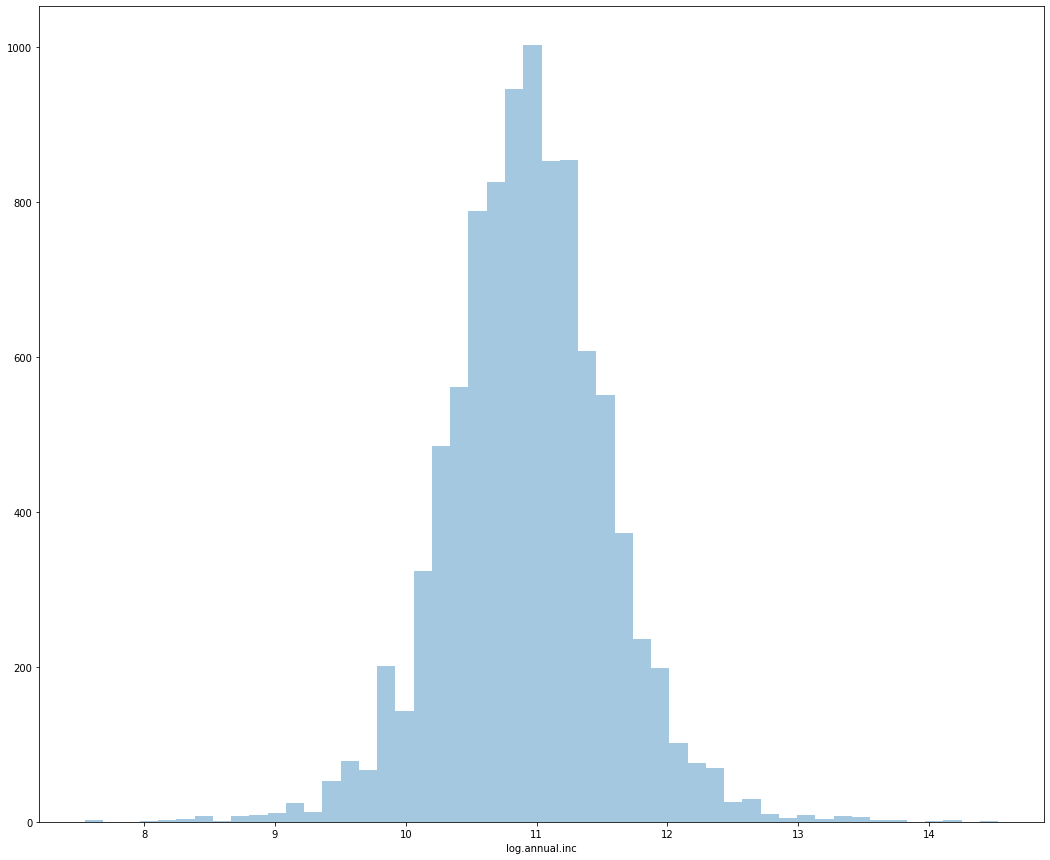

In [12]:
#log.annual.inc: The natural log of the self-reported annual income of the borrower.
plt.figure(figsize=(18,15))
sns.distplot(df['log.annual.inc'], kde=False)
plt.show()

It is interesting to note that most people who borrow money converge in almost the same income bracket

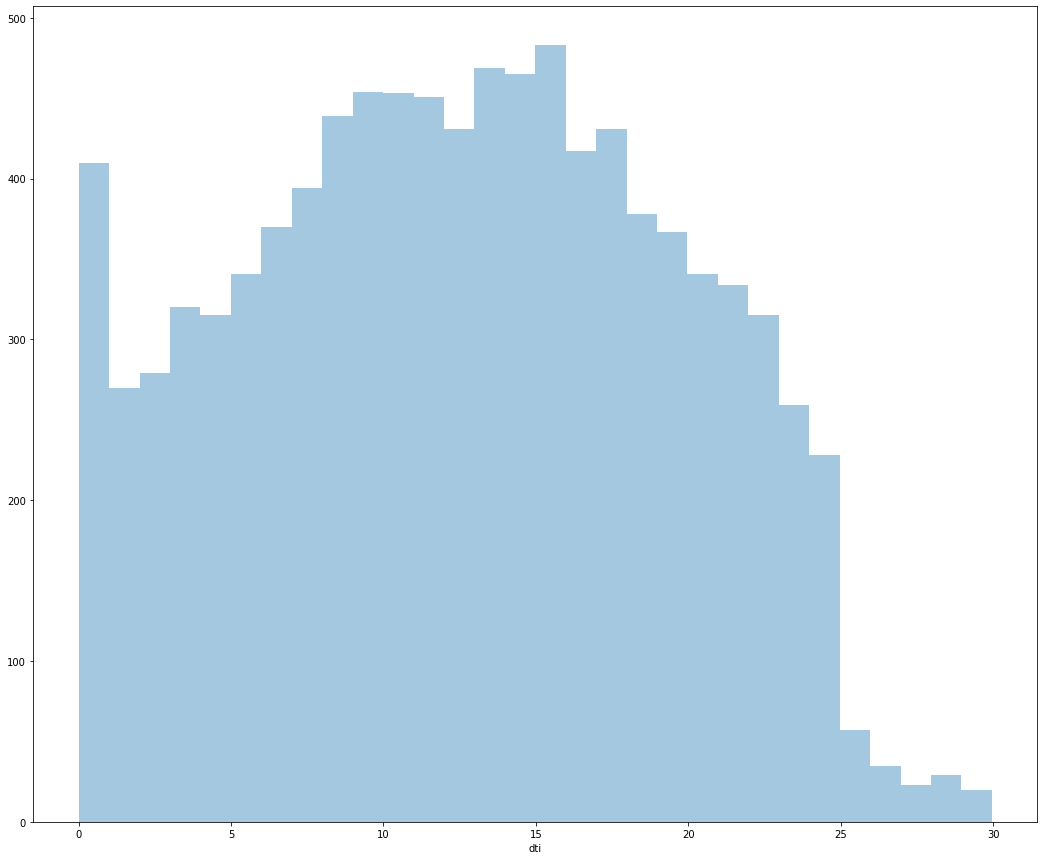

In [13]:
#dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
plt.figure(figsize=(18,15))
sns.distplot(df['dti'], kde=False)
plt.show()

It is interesting to see here that the highest count of loans have borrowers that borrowed 15 times their annual salary

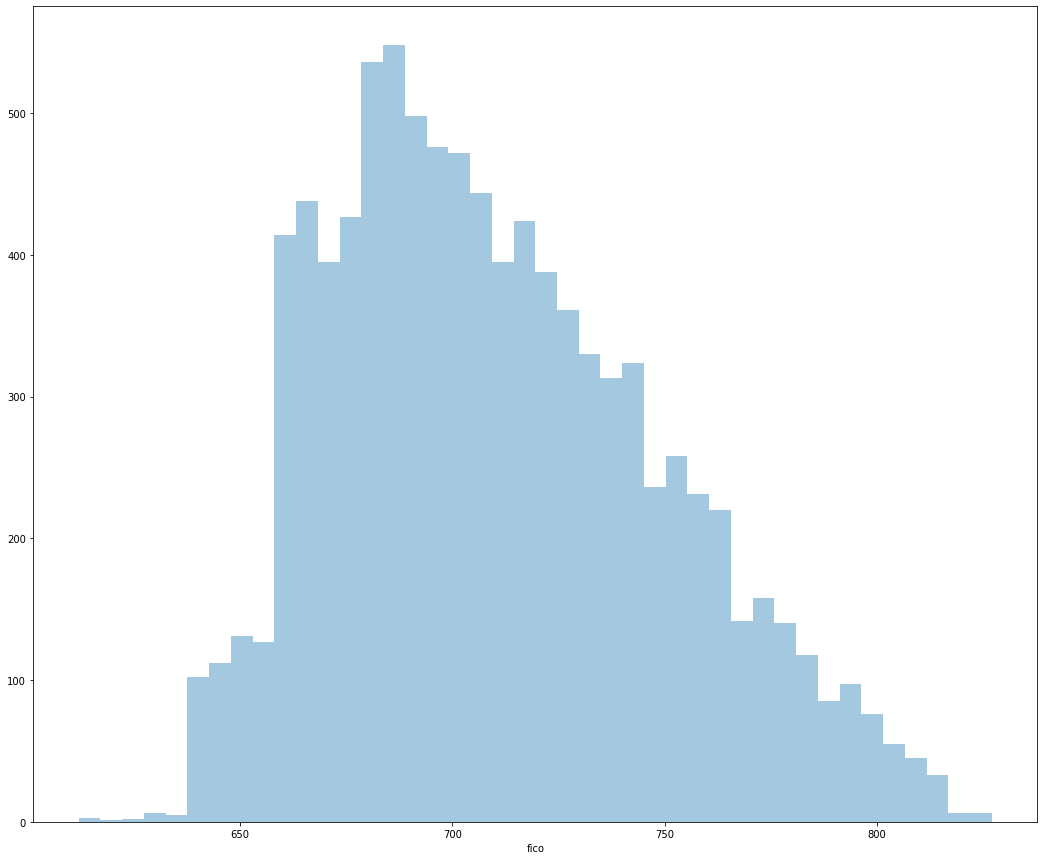

In [14]:
#fico: The FICO credit score of the borrower.
plt.figure(figsize=(18,15))
sns.distplot(df['fico'], kde=False)
plt.show()

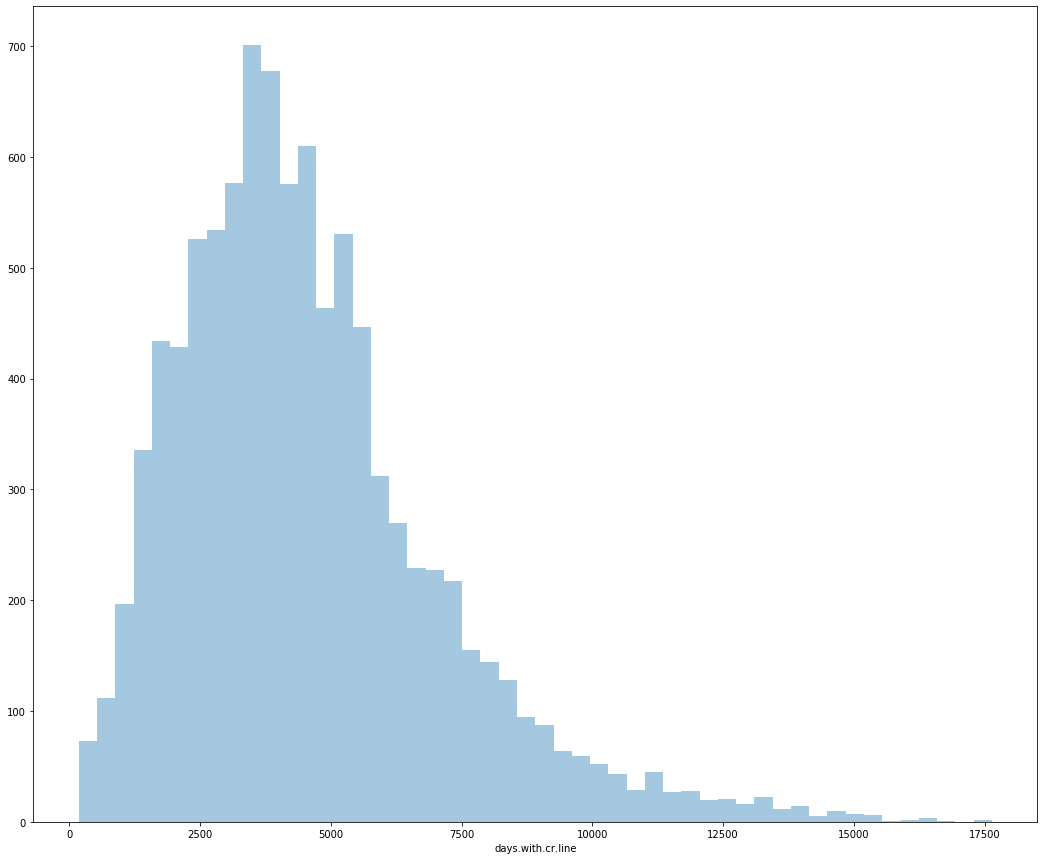

In [15]:
#days.with.cr.line: The number of days the borrower has had a credit line.
plt.figure(figsize=(18,15))
sns.distplot(df['days.with.cr.line'], kde=False)
plt.show()

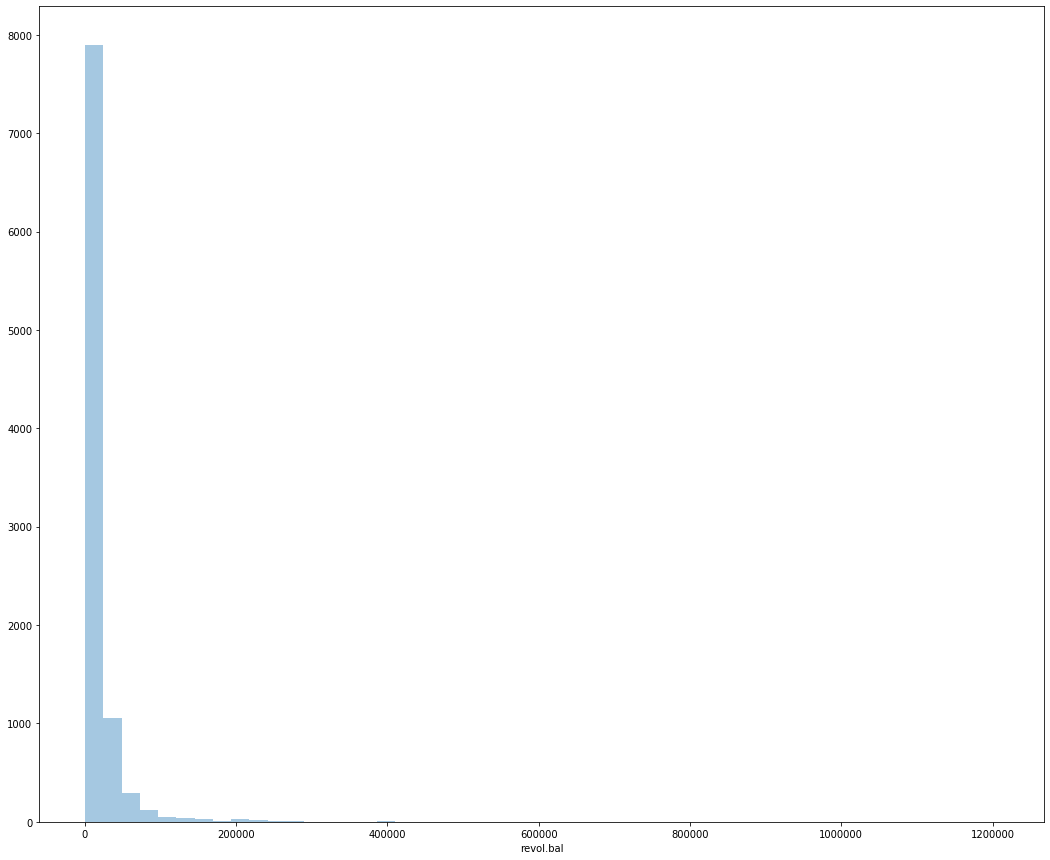

In [16]:
#revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
plt.figure(figsize=(18,15))
sns.distplot(df['revol.bal'], kde=False)
plt.show()

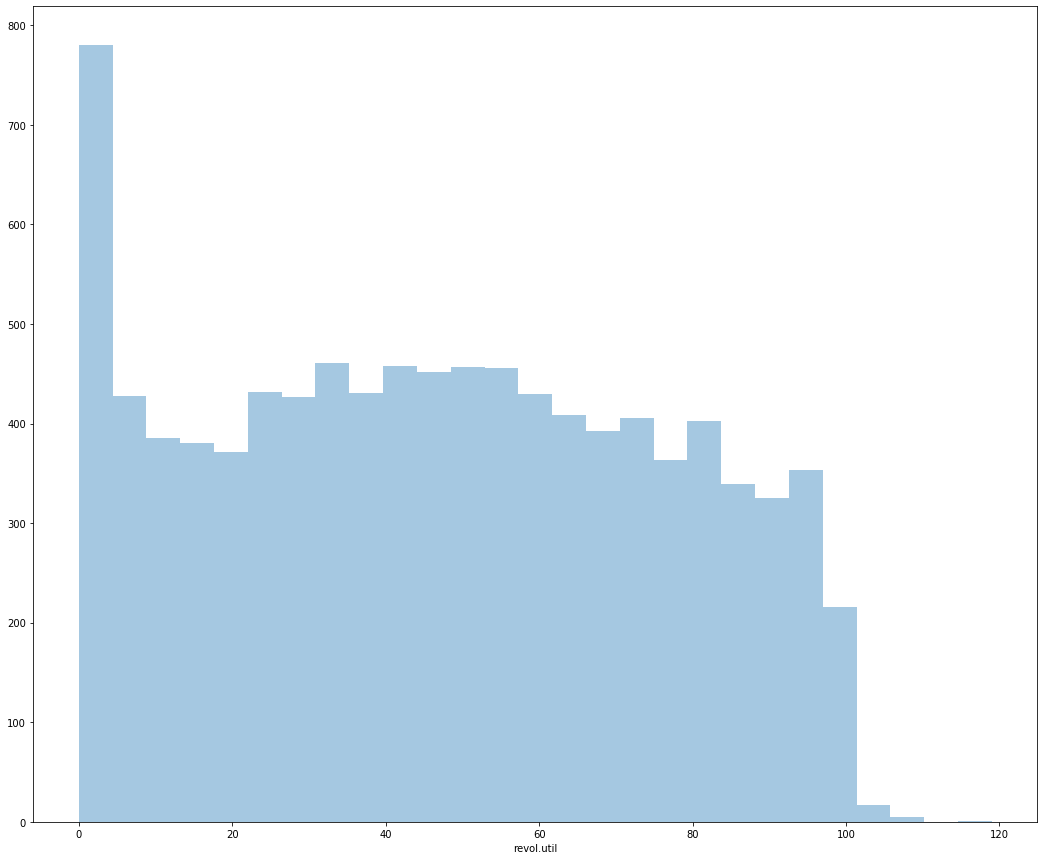

In [17]:
#revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
plt.figure(figsize=(18,15))
sns.distplot(df['revol.util'], kde=False)
plt.show()

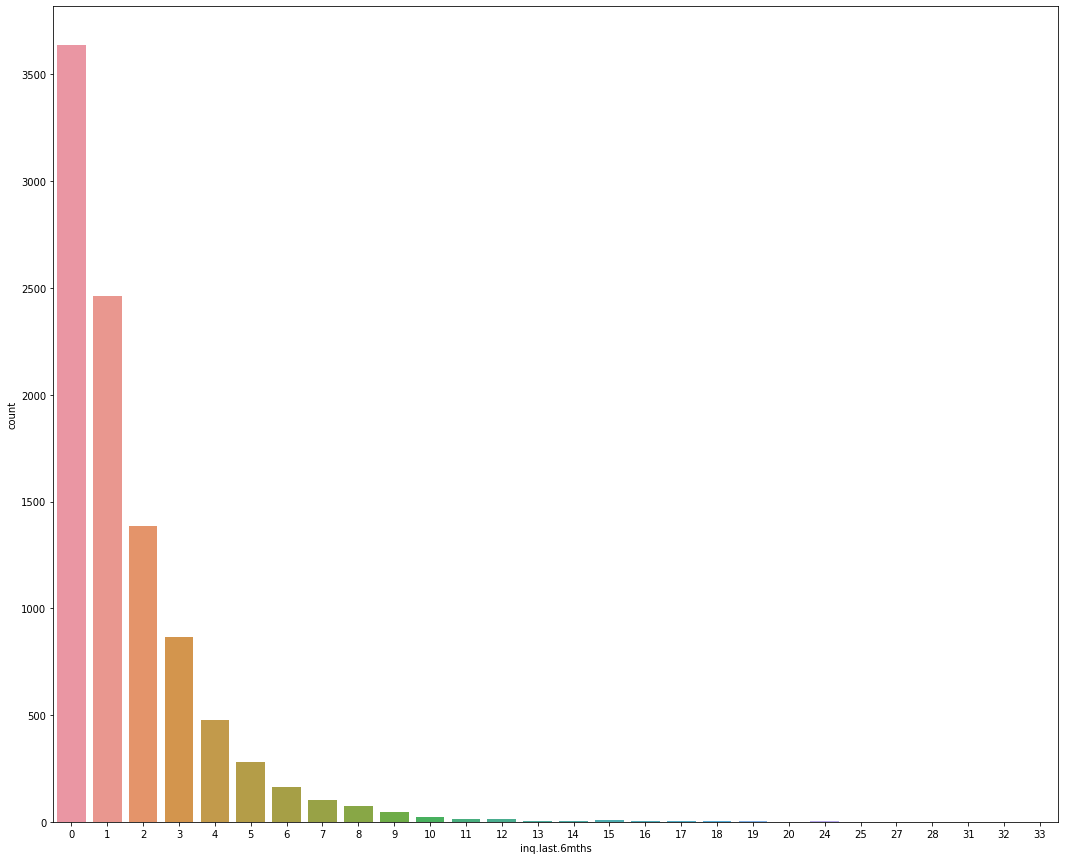

In [18]:
#inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
plt.figure(figsize=(18,15))
sns.countplot(df['inq.last.6mths'])
plt.show()

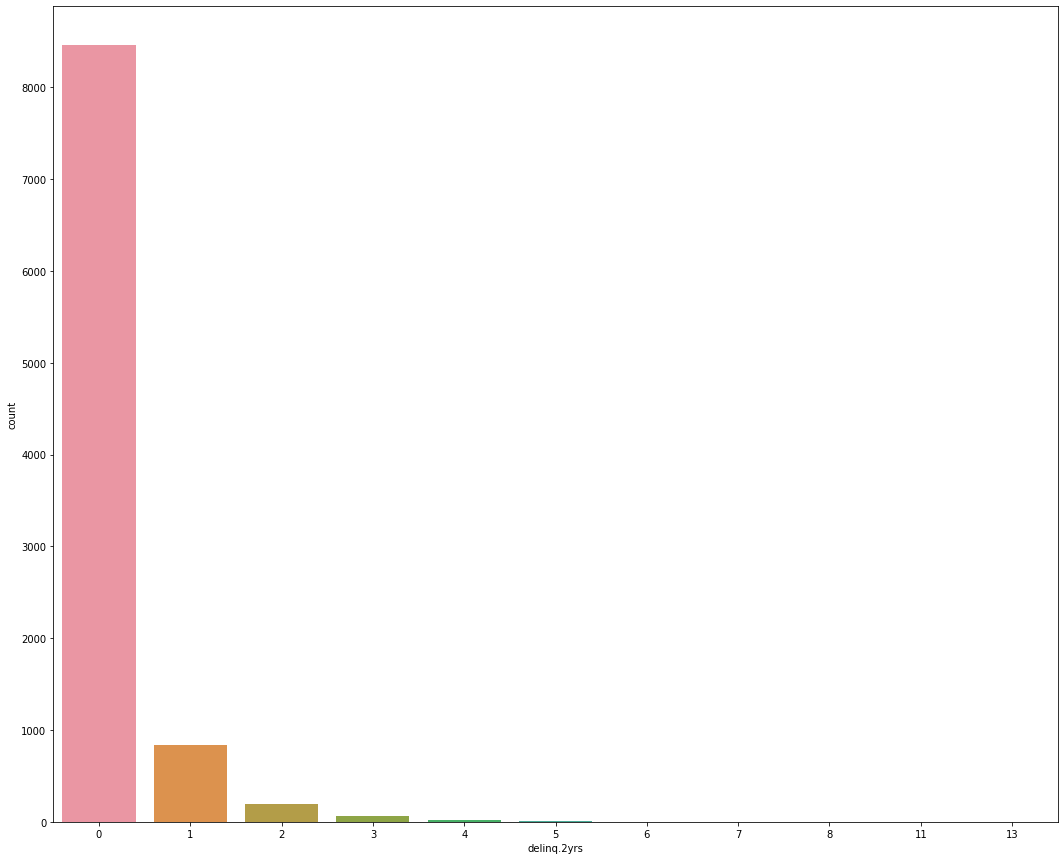

In [19]:
#delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
plt.figure(figsize=(18,15))
sns.countplot(df['delinq.2yrs'])
plt.show()

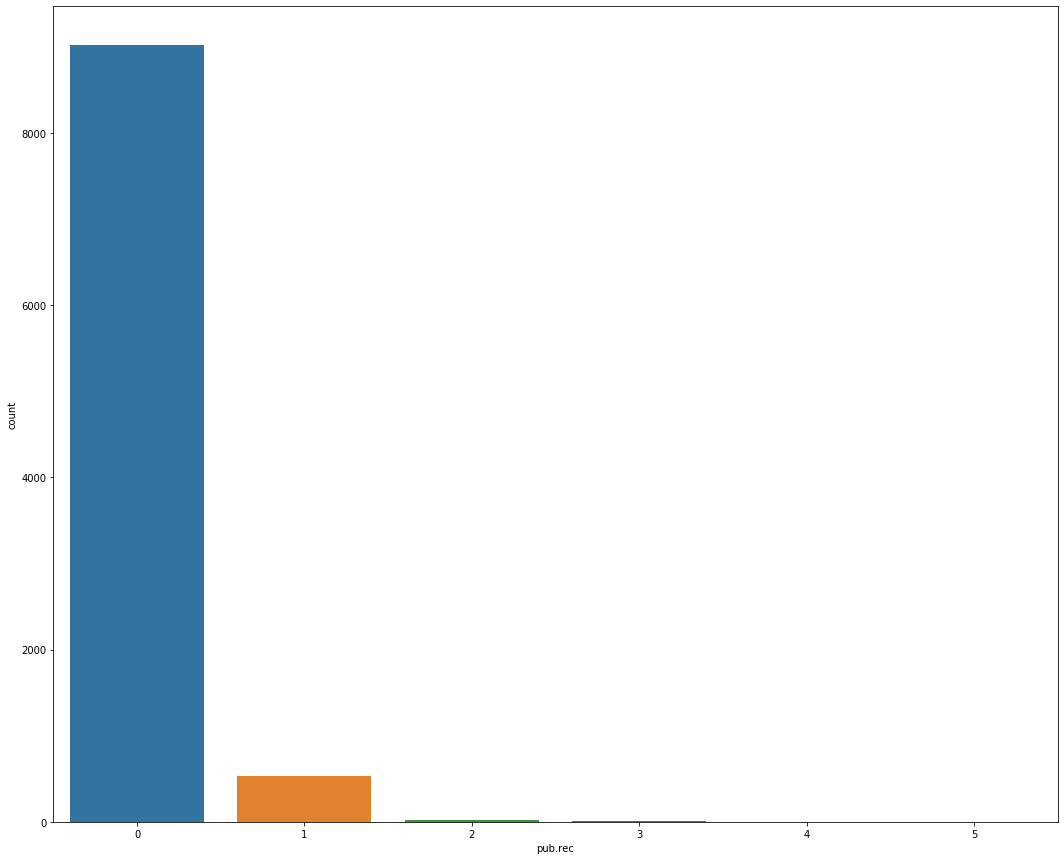

In [20]:
#pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
plt.figure(figsize=(18,15))
sns.countplot(df['pub.rec'])
plt.show()

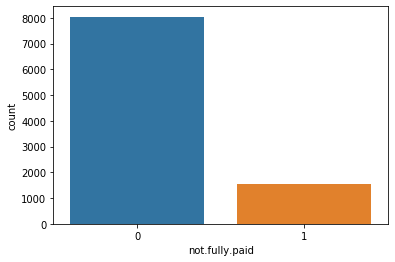

In [21]:
#not fully paid borrowers
sns.countplot(df['not.fully.paid'])

The biggest imbalance that will have a huge impact in our analysis is in the column that informs us if the borrower has paid, hence we will normalize this.

Why a big impact? Because the main goal of this analysis is to predict if the borrower will pay his or her debt with the given factors. With the not fully paid column having a big imbalance, we cannot predict accurately.

### Fixing Imbalance in the 'not.full.paid' column
We need to fix the imbalanced data by undersampling the 'not.fully.paid' column.
Why undersampling and not oversampling? Because we do not have a lot of data! 

In [24]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

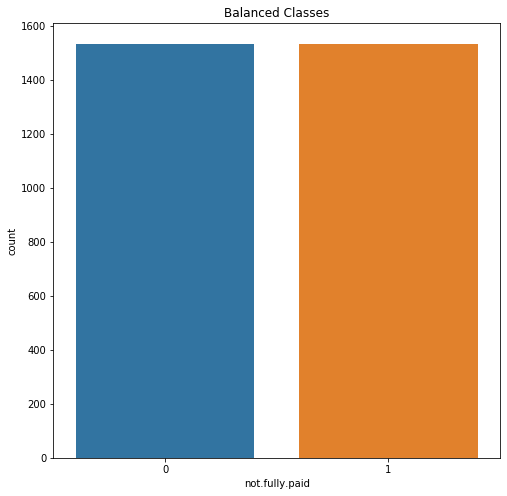

In [25]:
# Shuffle the Dataset.
shuffled_df = norm.sample(frac=1,random_state=4)

# Put all the "1" class in a separate dataset.
paid = shuffled_df.loc[shuffled_df['not.fully.paid'] == 1]

#Randomly select 492 observations from the "0" (majority class)
not_paid = shuffled_df.loc[shuffled_df['not.fully.paid'] == 0].sample(n=1533,random_state=42)

# Concatenate both dataframes again
under = pd.concat([paid, not_paid])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('not.fully.paid', data=under)
plt.title('Balanced Classes')
plt.show()

#reference: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

In [26]:
under.shape

(3066, 14)

By balancing the dataset so that we have an equal number of observations from borrowers who paid and who did not, from 9578 observations, it has now whittled down to 3066, it is not a lot of data but we will make the best of it!

### Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

Now the analyst will provide a correlation heatmap to observe the differences between the relationship of the factors. The first heatmap will show the unbalanced dataset with 9578 observations and the second heatmap will show the balanced dataset with 3066 observations.

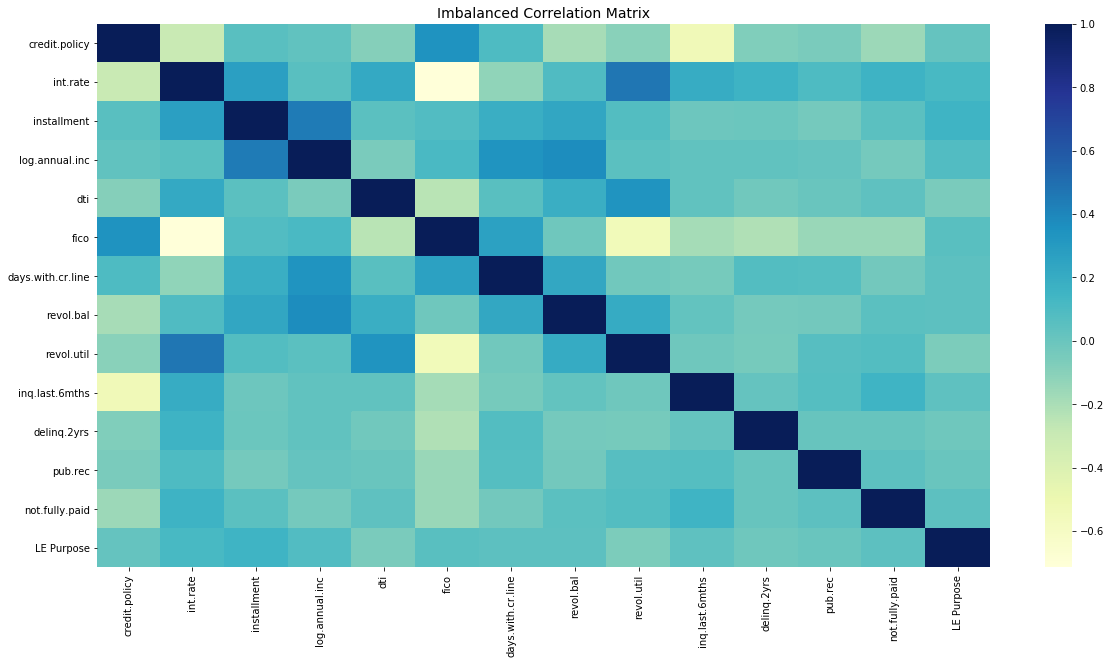

In [27]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

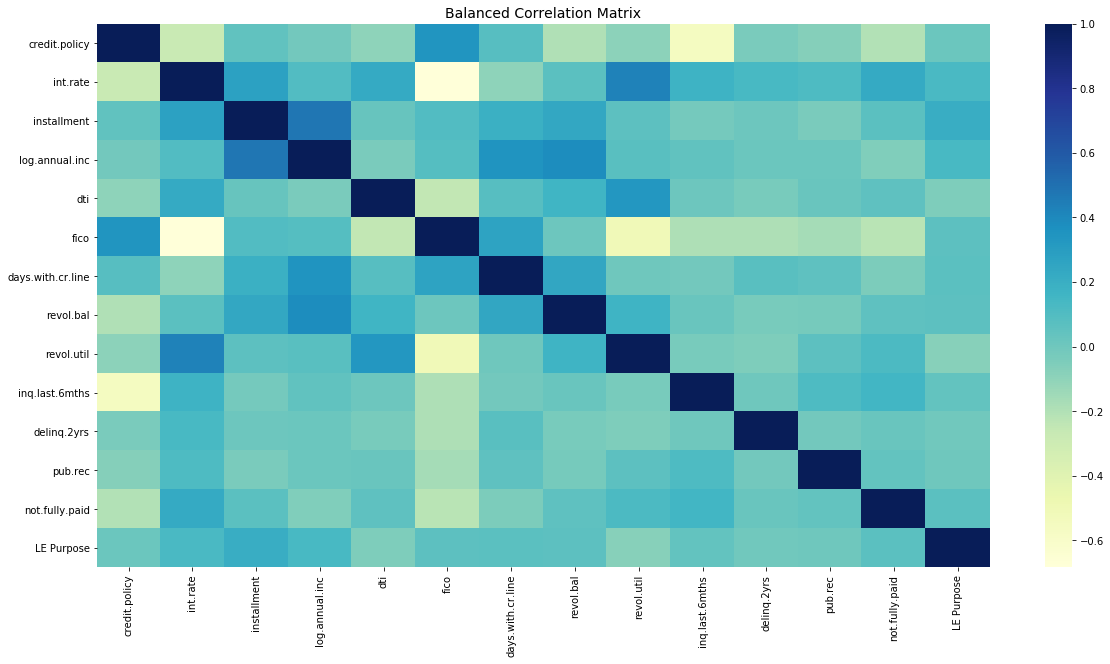

In [28]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = under.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix", fontsize=14)
plt.show()

As we observe, with the balanced dataset, the relationships are clearer due to the factors having a greater correlation compared to the unbalanced dataset. Hence, we will now plug this in to the aritificial neural network.

### Modeling with Tensorflow and Keras

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [29]:
#splitting the dataset 
from sklearn.model_selection import train_test_split
features = under.loc[:, under.columns != 'not.fully.paid']
target = under['not.fully.paid']
class_names = under['not.fully.paid']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [30]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((2452, 13), (614, 13), (2452,), (614,))

In [31]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [32]:
features_train=np.array(features_train)
target_train=np.array(target_train)
features_test=np.array(features_test)
target_test=np.array(target_test)

In [33]:
#feature scaling

#MinMaxScaler (lower than Robust Scalar)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#features_train_scaled = scaler.fit_transform(features_train)
#features_test_scaled = scaler.transform(features_test)

#58% with Robust Scaler
#Robust Scaler
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
features_train_scaled = transformer.fit_transform(features_train)
features_test_scaled = transformer.transform(features_test)

#48% accuracy without scaling 
#features_train_scaled = features_train
#features_test_scaled = features_test

In [34]:
#Input your dimensions here
input_dim=13

model = Sequential()
model.add(Dense(80, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(features_train_scaled, target_train, epochs=10000)

Epoch 1/10000
77/77 [==============================] - 0s 767us/step - loss: 0.6781 - accuracy: 0.5714
Epoch 2/10000
77/77 [==============================] - 0s 738us/step - loss: 0.6626 - accuracy: 0.5979
Epoch 3/10000
77/77 [==============================] - 0s 832us/step - loss: 0.6545 - accuracy: 0.6122
Epoch 4/10000
77/77 [==============================] - 0s 745us/step - loss: 0.6475 - accuracy: 0.6170
Epoch 5/10000
77/77 [==============================] - 0s 729us/step - loss: 0.6491 - accuracy: 0.6264
Epoch 6/10000
77/77 [==============================] - 0s 854us/step - loss: 0.6502 - accuracy: 0.6338
Epoch 7/10000
77/77 [==============================] - 0s 882us/step - loss: 0.6382 - accuracy: 0.6358
Epoch 8/10000
77/77 [==============================] - 0s 860us/step - loss: 0.6444 - accuracy: 0.6313
Epoch 9/10000
77/77 [==============================] - 0s 842us/step - loss: 0.6295 - accuracy: 0.6485
Epoch 10/10000
77/77 [==============================] - 0s 878us/step - l

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                1120      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                8

In [38]:
test_loss, test_acc = model.evaluate(features_test_scaled,target_test)

print('Test accuracy:', test_acc)

20/20 [==============================] - 0s 499us/step - loss: 1.6024 - accuracy: 0.5603
Test accuracy: 0.5602605938911438


In [39]:
predictions = model.predict(features_test_scaled)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predictions.round())

0.5602605863192183

In [41]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, predictions.round())
cnf_matrix

array([[192, 106],
       [164, 152]], dtype=int64)

In [42]:
TN, FP, FN, TP = confusion_matrix(target_test, predictions.round()).ravel() 
TN, FP, FN, TP

(192, 106, 164, 152)

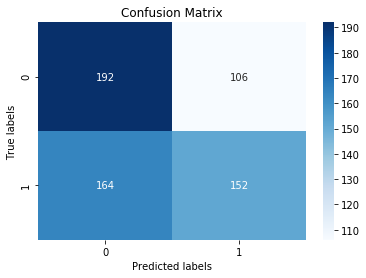

In [43]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [44]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.4810126582278481

In [45]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.6442953020134228

In [46]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.5891472868217055

In [47]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.5393258426966292

In [48]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR


0.4108527131782945

In [49]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.5296167247386759

In [50]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, predictions )

0.5778289864922267

### Observations:
Accuracy is very low and predictive power is poor with all of the dimensions plugged in.
Cause for poor prediction is due to the dataset having too many "junk" dimensions that have little to no correlation to the factors that affect a borrower's capacity and situation to pay their debt.
Hence, the analyst has applied a feature selection algorithm that will help determine what the factors are that significantly affect the borrower's situation and capacity to pay their debt.

### Feature Selection using Boruta

The Boruta algorithm is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features you might have in your data set with respect to an outcome variable.

Methodology:

1) First it creates randomness to the features by creating duplicate features and shuffle the values in each column. These features are called Shadow Features.

2) Trains a classifier (Random Forest) on the Dataset and calculate the importance using Mean Decrease Accuracy or Mean Decrease Impurity.

3) Then, the algorithm checks for each of your real features if they have higher importance. That is, whether the feature has a higher Z-score than the maximum Z-score of its shadow features than the best of the shadow features.

4) At every iteration, the algorithm compares the Z-scores of the shuffled copies of the features and the original features to see if the latter performed better than the former. If it does, the algorithm will mark the feature as important.

Reference: https://medium.com/@indreshbhattacharyya/feature-selection-categorical-feature-selection-boruta-light-gbm-chi-square-bf47e94e2558

Person who made Boruta in python: http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/

Documentation: https://github.com/scikit-learn-contrib/boruta_py

In [51]:
#pip install Boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

In [52]:
#converting pd.dataframe to pd.array for Boruta's understanding
X = under.drop(columns=['not.fully.paid'])
y = under['not.fully.paid'].to_numpy()

In [53]:
#initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, #this is setup to use all processors of your cpu 
   #max_depth = 1
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   alpha = 0.01, #Currently set at 99% significance. Level at which the corrected p-values will get rejected in both correction steps.
   max_iter = 50000 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

#reference: https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a

features in the green area: ['int.rate', 'log.annual.inc', 'revol.util']
features in the blue area: []


As you can see, the features stored in boruta.support_ are the ones that at some point ended up in the acceptance area, thus you should include them in your model. The features stored in boruta.support_weak_ are the ones that Boruta didn’t manage to accept or refuse (blue area) and the choice is up to the data scientist: these features may be accepted or not depending on the use case.
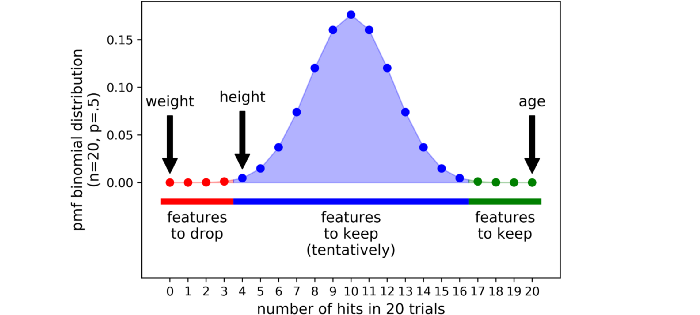

- an area of refusal (the red area): the features that end up here are considered as noise, so they are dropped;
- an area of irresolution (the blue area): Boruta is indecisive about the features that are in this area;
- an area of acceptance (the green area): the features that are here are considered as predictive, so they are kept.

In [54]:
#Boruta Full Report
print ('\n Initial features: ', under.drop(columns=['not.fully.paid'], axis=1).columns.tolist()) 

# number of selected features
print ('\n Number of selected features:', boruta.n_features_)

feature_df = pd.DataFrame(under.drop(columns=['not.fully.paid'], axis=1).columns.tolist(), columns=['features'])
feature_df['rank']=boruta.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta.n_features_)
print(feature_df.head(boruta.n_features_))
print('\n All Features:')
feature_df.reset_index(drop=True)
#feature_df.to_csv('boruta-feature-ranking.csv', index=False)

#Reference: https://www.kaggle.com/tilii7/boruta-feature-elimination


 Initial features:  ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'LE Purpose']

 Number of selected features: 3

 Top 3 features:
         features  rank
0        int.rate     1
1  log.annual.inc     1
2      revol.util     1

 All Features:


,features,rank
0,int.rate,1
1,log.annual.inc,1
2,revol.util,1
3,installment,2
4,days.with.cr.line,3
5,dti,4
6,revol.bal,5
7,fico,6
8,credit.policy,7
9,inq.last.6mths,8


### Observation:
Now we know that the only factors that significantly (99% significance) affect the borrower's decision and capacity to pay their debt is the interest rate of their loan and their annual income. Let us now try to focus on predicting wether the borrower will pay their debt based on their loan's interest rate and annual income. I did not include revol.util in the analysis because it keeps on popping up in 1st ranking and 3rd ranking, in different runs erratically.

## Modeling with Tensorflow and Keras

In [55]:
boruta_df = df.drop(columns=['credit.policy','purpose','installment','dti','fico','days.with.cr.line','inq.last.6mths','delinq.2yrs','pub.rec','revol.bal','LE Purpose','revol.util'])
boruta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   int.rate        9578 non-null   float64
 1   log.annual.inc  9578 non-null   float64
 2   not.fully.paid  9578 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 224.6 KB


In [56]:
#splitting the dataset 
from sklearn.model_selection import train_test_split
features = boruta_df.loc[:, boruta_df.columns != 'not.fully.paid']
target = boruta_df['not.fully.paid']
class_names = boruta_df['not.fully.paid']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [57]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((7662, 2), (1916, 2), (7662,), (1916,))

In [58]:
features_train=np.array(features_train)
target_train=np.array(target_train)
features_test=np.array(features_test)
target_test=np.array(target_test)

In [59]:
#Robust Scaler
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
features_train_scaled = transformer.fit_transform(features_train)
features_test_scaled = transformer.transform(features_test)

In [60]:
#Input your dimensions here
input_dim=2

model = Sequential()
model.add(Dense(80, input_dim=input_dim, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
model.fit(features_train_scaled, target_train, epochs=10000)

Epoch 1/10000
240/240 [==============================] - 0s 531us/step - loss: 0.4963 - accuracy: 0.8153
Epoch 2/10000
240/240 [==============================] - 0s 511us/step - loss: 0.4285 - accuracy: 0.8408
Epoch 3/10000
240/240 [==============================] - 0s 553us/step - loss: 0.4253 - accuracy: 0.8408
Epoch 4/10000
240/240 [==============================] - 0s 563us/step - loss: 0.4243 - accuracy: 0.8408
Epoch 5/10000
240/240 [==============================] - 0s 537us/step - loss: 0.4238 - accuracy: 0.8408
Epoch 6/10000
240/240 [==============================] - 0s 542us/step - loss: 0.4235 - accuracy: 0.8408
Epoch 7/10000
240/240 [==============================] - 0s 480us/step - loss: 0.4233 - accuracy: 0.8408
Epoch 8/10000
240/240 [==============================] - 0s 507us/step - loss: 0.4229 - accuracy: 0.8408
Epoch 9/10000
240/240 [==============================] - 0s 464us/step - loss: 0.4229 - accuracy: 0.8405
Epoch 10/10000
240/240 [==============================]

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 80)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 81        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [64]:
test_loss, test_acc = model.evaluate(features_test_scaled,target_test)

print('Test accuracy:', test_acc)

60/60 [==============================] - 0s 500us/step - loss: 0.4395 - accuracy: 0.8356
Test accuracy: 0.8355950117111206


In [65]:
predictions = model.predict(features_test_scaled)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predictions.round())

0.8355949895615866

In [67]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, predictions.round())
cnf_matrix

array([[1601,    2],
       [ 313,    0]], dtype=int64)

In [68]:
TN, FP, FN, TP = confusion_matrix(target_test, predictions.round()).ravel() 
TN, FP, FN, TP

(1601, 2, 313, 0)

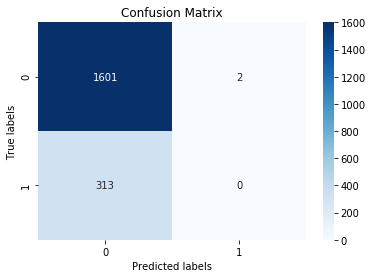

In [69]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [70]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.0

In [71]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9987523393636931

In [72]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.0

In [73]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.8364681295715779

In [74]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

1.0

In [75]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

C:\Users\Timothy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


0.0

In [76]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, predictions )

0.6038089524633325

### Final Observation:
We have a much higher accuracy and more accurate predictions with the "feature selected" dataset (83% accuracy with paid and unpaid debts predicted with the loan's intrest rate and annual income of the borrower) compared to the first round of applying the ANN which is not removing any of the columns and predicting paid and unpaid debts with all of the features (56% accuracy).

### Recommendation: Need more Data, specifically a dataset with the "paid and unpaid" information having more representatives wherein the count of the paid and unpaid debts are at a near equal count to get better and more accurate insights.

Reference: https://github.com/jayborkar/Home-Credit/blob/master/HomeCredit_Data.ipynb